# Importing Libraries

In [1]:
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import numpy as np
import cv2

# Task 1

In [25]:
import numpy as np
from PIL import Image

def calculate_threshold(image_path):
    # Open the image and convert it to grayscale
    image = Image.open(image_path).convert('L')
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Calculate the sum of all pixel values
    total_sum = 0
    num_elements = 0
    
    for row in image_array:
        for pixel in row:
            total_sum += pixel
            num_elements += 1
    
    # Calculate the average pixel value
    threshold = total_sum / num_elements
    return threshold


In [27]:
threshold = calculate_threshold('th.jpg')
print(threshold)

54.921325032080226


# Task 2

In [3]:
from PIL import Image

def image_to_rgb_list(image_path):
    # Open the image file
    img = Image.open(image_path)
    # Convert the image to RGB
    img = img.convert('RGB')
    # Get the dimensions of the image
    width, height = img.size
    # Create a 3D list to store the RGB values
    rgb_list = []
    for y in range(height):
        row = []
        for x in range(width):
            r, g, b = img.getpixel((x, y))
            row.append([r, g, b])
        rgb_list.append(row)
    return rgb_list

In [4]:
def rgb_to_greyscale(image):
    # Get the dimensions of the image
    height = len(image)
    width = len(image[0])
    
    # Create a new image to store the greyscale values
    greyscale_image = [[0 for _ in range(width)] for _ in range(height)]
    
    for i in range(height):
        for j in range(width):
            # Extract the RGB values
            r, g, b = image[i][j]
            
            # Calculate the greyscale value using the luminosity method
            grey = int(0.21 * r + 0.72 * g + 0.07 * b)
            
            # Assign the greyscale value to the new image
            greyscale_image[i][j] = grey
    
    return greyscale_image


In [5]:
image_rgb_list = image_to_rgb_list('th.jpg')

# Apply the rgb_to_greyscale function to the 3D list
greyscale_image = rgb_to_greyscale(image_rgb_list)

# Print a success message
print("The image has been successfully converted to greyscale.")

The image has been successfully converted to greyscale.


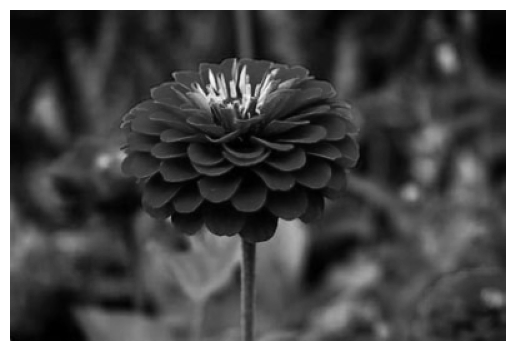

In [6]:
import matplotlib.pyplot as plt

def plot_greyscale_image(greyscale_image):
    plt.imshow(greyscale_image, cmap='gray')
    plt.axis('off')  # Hide the axis
    plt.show()

# Plot the greyscale image
plot_greyscale_image(greyscale_image)

# Task 3

In [7]:
def simple_halftoning(image_path, threshold=128):
    # Open the image and convert it to grayscale
    image = Image.open(image_path).convert('L')
    
    # Convert the image to a numpy array
    image_array = np.array(image)
    
    # Apply the threshold
    halftoned_array = np.where(image_array < threshold, 0, 255)
    
    # Convert the halftoned array back to an image
    halftoned_image = Image.fromarray(halftoned_array.astype(np.uint8))
    
    return halftoned_image

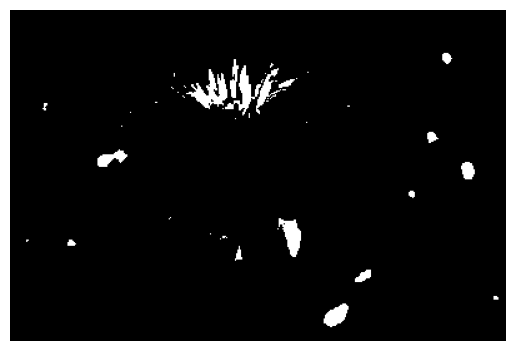

In [20]:
def plot_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide the axis
    plt.show()

# Example usage
image_path = 'th.jpg'  # Replace with the actual path to your image
halftoned_image = simple_halftoning(image_path)

# Plot the halftoned image
plot_image(halftoned_image)

In [8]:
def advanced_halftoning(image_path, threshold=128):
    # Open the image and convert it to grayscale
    image = Image.open(image_path).convert('L')
    # Convert the image to a numpy array
    image_array = np.array(image)
    # Get the dimensions of the image
    rows, cols = image_array.shape
    # Create an output array to store the halftoned image
    halftoned_array = np.zeros((rows, cols), dtype=np.uint8)
    for i in range(rows):
        for j in range(cols):
            old_pixel = image_array[i, j]
            new_pixel = 0 if old_pixel < threshold else 255
            halftoned_array[i, j] = new_pixel
            error = old_pixel - new_pixel
            # Propagate the error to neighboring pixels
            if j + 1 < cols:
                image_array[i, j + 1] += error * 7 / 16
            if i + 1 < rows and j > 0:
                image_array[i + 1, j - 1] += error * 3 / 16
            if i + 1 < rows:
                image_array[i + 1, j] += error * 5 / 16
            if i + 1 < rows and j + 1 < cols:
                image_array[i + 1, j + 1] += error * 1 / 16
    # Convert the halftoned array back to an image
    halftoned_image = Image.fromarray(halftoned_array)    
    return halftoned_image


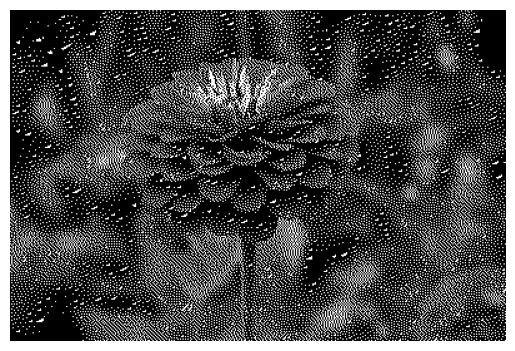

In [21]:
def plot_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')  # Hide the axis
    plt.show()

# Example usage
image_path = 'th.jpg'  # Replace with the actual path to your image
adv_halftoned_image = advanced_halftoning(image_path)

# Plot the halftoned image
plot_image(adv_halftoned_image)

# Task 4

In [33]:
def custom_histogram_equalization(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    
    # Calculate the histogram
    hist = np.zeros(256, dtype=int)
    for pixel in image.flatten():
        hist[pixel] += 1
    
    # Calculate the cumulative histogram
    cum_hist = np.cumsum(hist)
    
    # Normalize the cumulative histogram
    cum_hist_normalized = (cum_hist - cum_hist.min()) * 255 / (cum_hist.max() - cum_hist.min())
    cum_hist_normalized = cum_hist_normalized.astype('uint8')
    
    # Map the old pixel values to new values
    equalized_image = cum_hist_normalized[image]
    
    # Plot the original and equalized histograms
    plt.figure()
    plt.title("Original Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(hist)
    plt.xlim([0, 256])
    plt.show()
    
    equalized_hist = np.zeros(256, dtype=int)
    for pixel in equalized_image.flatten():
        equalized_hist[pixel] += 1
    
    plt.figure()
    plt.title("Equalized Histogram")
    plt.xlabel("Bins")
    plt.ylabel("# of Pixels")
    plt.plot(equalized_hist)
    plt.xlim([0, 256])
    plt.show()
    
    return equalized_image

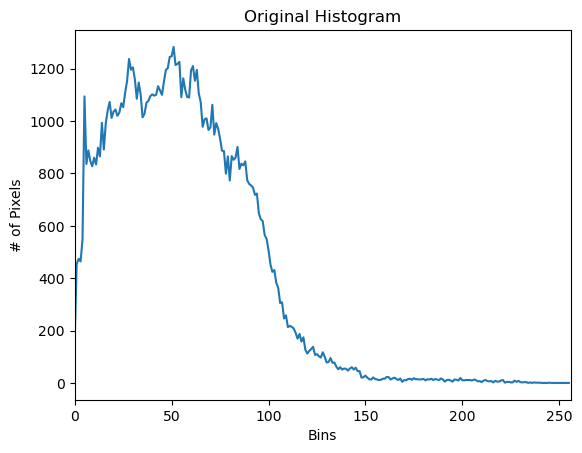

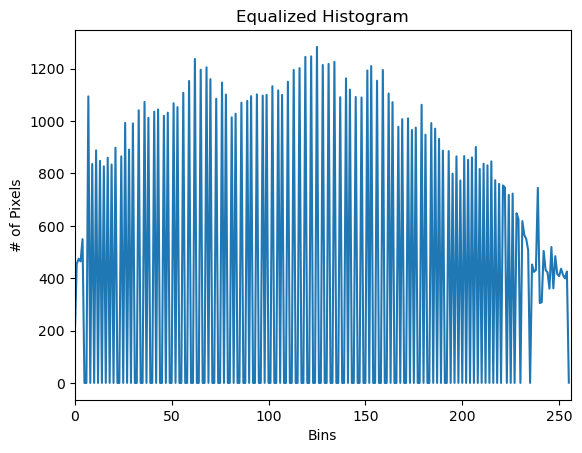

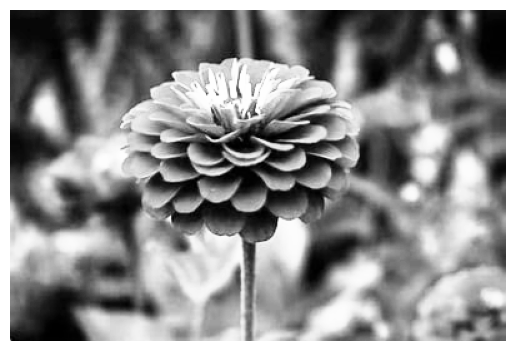

In [34]:
# Example usage
image_path = 'th.jpg'  # Replace with the actual path to your image
equalized_image = custom_histogram_equalization(image_path)

# Plot the halftoned image
plot_image(equalized_image)